In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading Data

In [ ]:
df = pd.read_csv('mothers_pleasure.csv')
df.head()

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework,mother_mood
0,older,son,yes,no,no,no,no,neutral
1,middle,son,yes,yes,no,no,no,unhappy
2,younger,son,no,half,no,no,no,happy
3,older,daughter,no,no,half,no,no,unhappy
4,middle,daughter,yes,no,no,no,no,unhappy


In [27]:
df.shape

(756, 8)

In [28]:
df.describe().round(2)

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework,mother_mood
count,756,756,756,756,756,756,756,756
unique,3,2,3,3,3,3,3,3
top,older,son,yes,no,no,no,no,neutral
freq,252,381,428,417,543,644,633,260


In [29]:
df.dtypes

child_type        object
gender            object
took_out_trash    object
swept             object
vacuumed          object
washed_dishes     object
did_homework      object
mother_mood       object
dtype: object

## Cleaning Data

In [30]:
df.isnull().sum()

child_type        0
gender            0
took_out_trash    0
swept             0
vacuumed          0
washed_dishes     0
did_homework      0
mother_mood       0
dtype: int64

## Charts

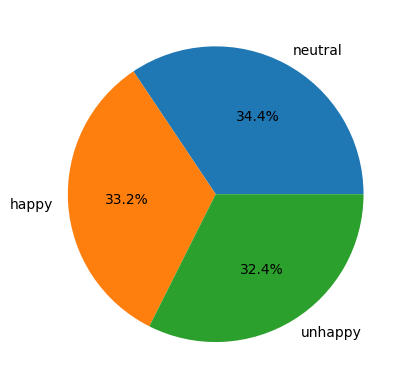

In [31]:
plt.pie(df['mother_mood'].value_counts(), labels=['neutral', 'happy', 'unhappy'], autopct='%1.1f%%')
plt.show()

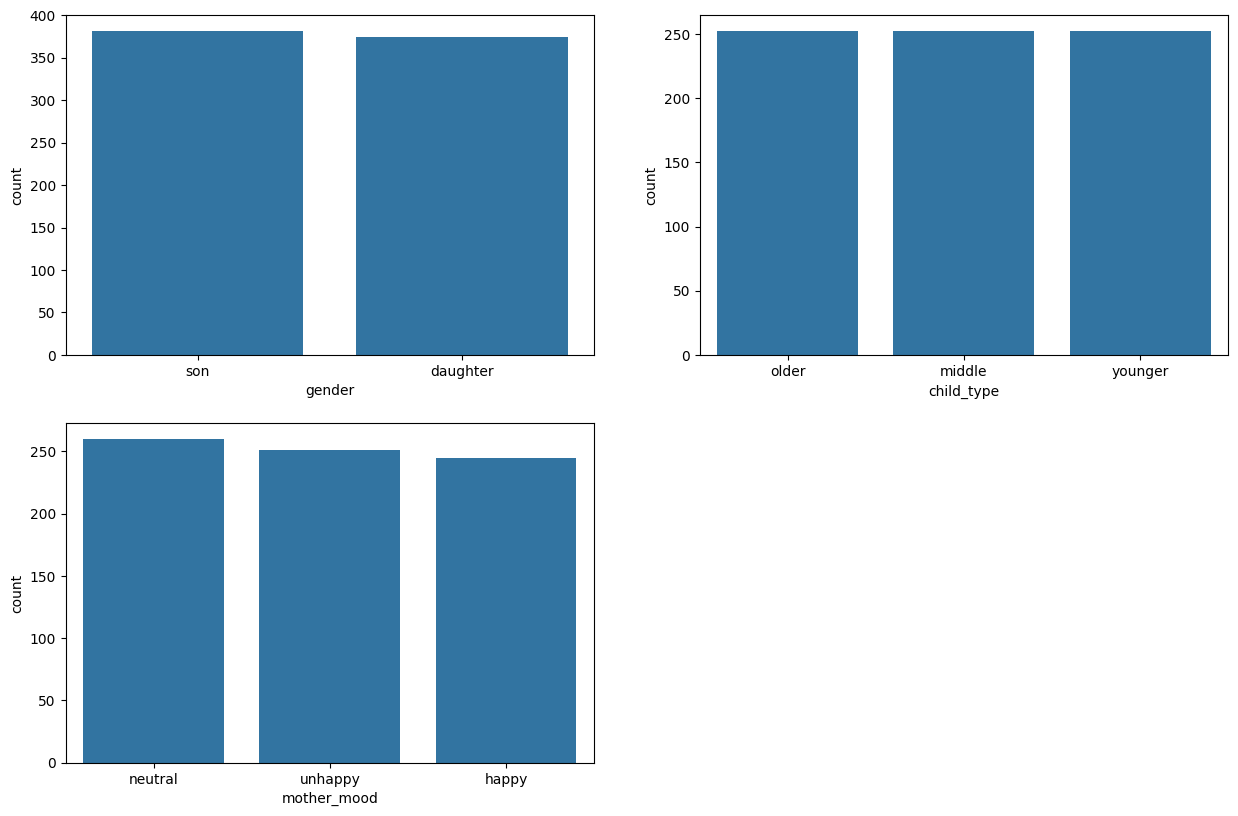

In [32]:
cols = ['gender', 'child_type', 'mother_mood']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1) # 3 - rows, 2 - columns i + 1 - index
    sns.countplot(x=col, data=df)

plt.show()

## Encoding Data

In [33]:
encoders = {}

columns = df.select_dtypes(include='object').drop(columns='mother_mood').columns

for col in columns:
    encoders[col] = LabelEncoder()
    encoders[col].fit(df[col])
    df[col] = encoders[col].transform(df[col])

df.head()

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework,mother_mood
0,1,1,2,1,1,1,1,neutral
1,0,1,2,2,1,1,1,unhappy
2,2,1,1,0,1,1,1,happy
3,1,0,1,1,0,1,1,unhappy
4,0,0,2,1,1,1,1,unhappy


In [34]:
df.dtypes

child_type         int64
gender             int64
took_out_trash     int64
swept              int64
vacuumed           int64
washed_dishes      int64
did_homework       int64
mother_mood       object
dtype: object

## Editional Charts

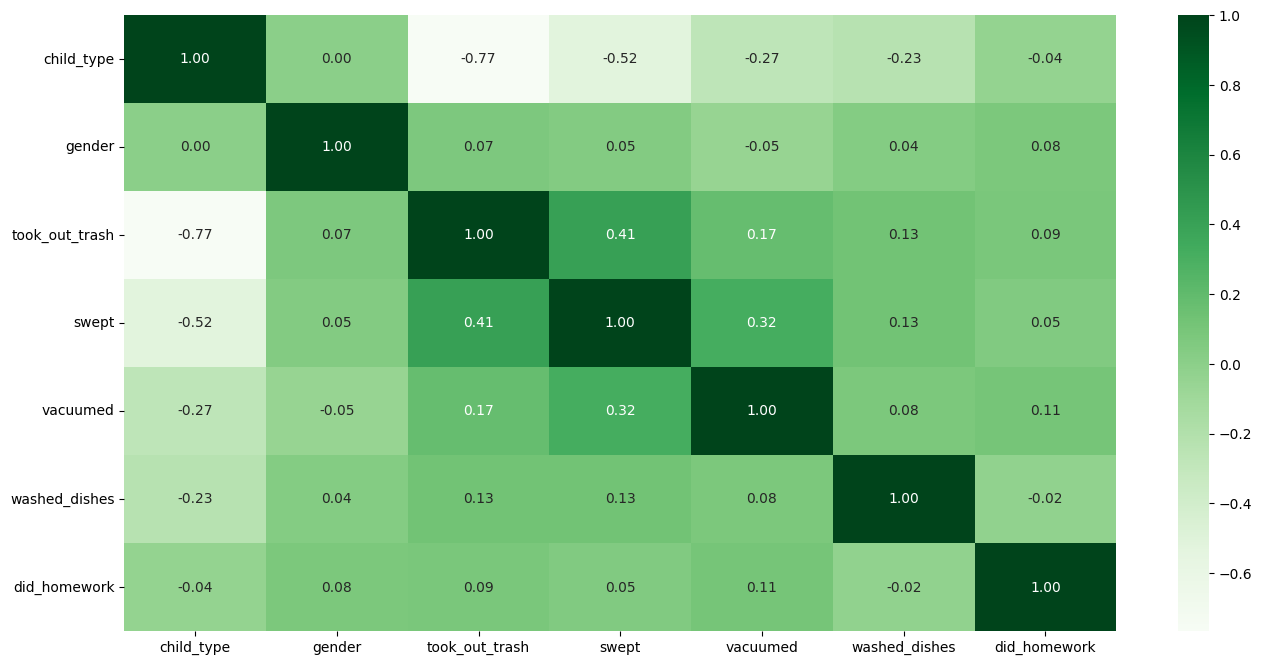

In [35]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='mother_mood').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [36]:
df.drop(columns='mother_mood').corr()

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
child_type,1.000000e+00,1.438924e-18,-0.766876,-0.519187,-0.271209,-0.230441,-0.037230
gender,1.438924e-18,1.000000e+00,0.069575,0.046682,-0.050989,0.040486,0.075729
took_out_trash,-7.668759e-01,6.957458e-02,1.000000,0.411042,0.173755,0.125253,0.087120
swept,-5.191866e-01,4.668249e-02,0.411042,1.000000,0.318865,0.126289,0.048860
vacuumed,-2.712093e-01,-5.098872e-02,0.173755,0.318865,1.000000,0.078593,0.106823
washed_dishes,-2.304412e-01,4.048601e-02,0.125253,0.126289,0.078593,1.000000,-0.023443
did_homework,-3.722973e-02,7.572919e-02,0.087120,0.048860,0.106823,-0.023443,1.000000


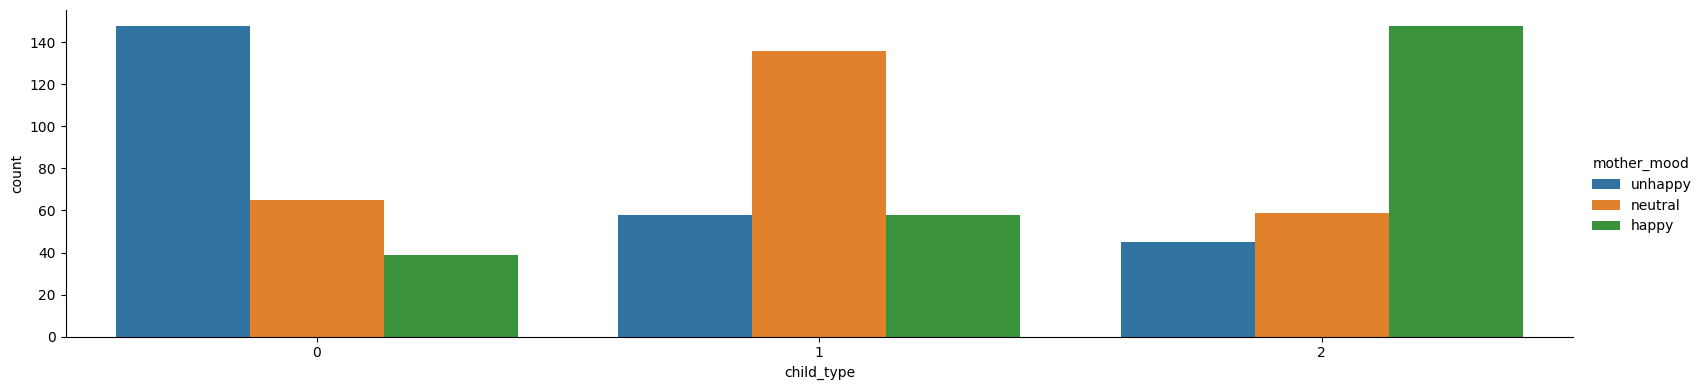

In [37]:
sns.catplot(data=df, x='child_type', height=4, aspect=4, kind='count', hue='mother_mood') # to cut , order=range(7, 73)
plt.show()

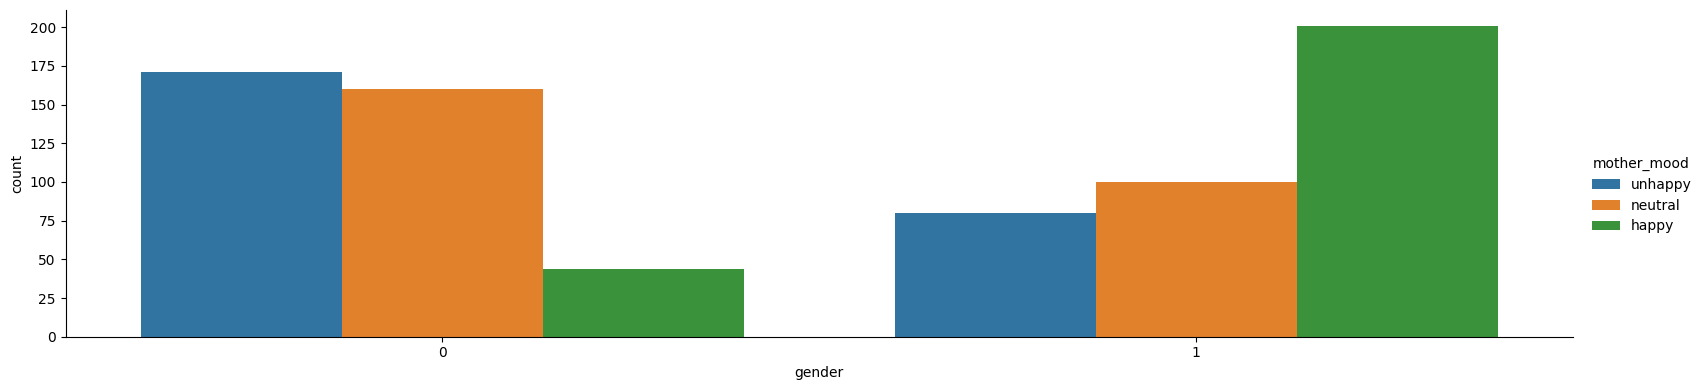

In [38]:
sns.catplot(data=df, x='gender', height=4, aspect=4, kind='count', hue='mother_mood') # to cut , order=range(7, 73)
plt.show()

## Creating Model and Testing with Own Data 

In [39]:
X = df.drop(columns='mother_mood')
X.head()

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
0,1,1,2,1,1,1,1
1,0,1,2,2,1,1,1
2,2,1,1,0,1,1,1
3,1,0,1,1,0,1,1
4,0,0,2,1,1,1,1


In [40]:
y = df['mother_mood']
y.head()

0    neutral
1    unhappy
2      happy
3    unhappy
4    unhappy
Name: mother_mood, dtype: object

In [41]:
model = DecisionTreeClassifier()
model.fit(X, y)
model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [42]:
test_data = {
    'child_type': [1],
    'gender': [2], # 1 - сын, 2 - дочь
    'took_out_trash': [0], # 0 - да 2 - нет  1 - на половину
    'swept': [0],
    'vacuumed': [0],
    'washed_dishes': [2],
    'did_homework': [2]
}
test_df = pd.DataFrame(test_data)
test_df

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
0,1,2,0,0,0,2,2


In [43]:
model.predict(test_df)

array(['unhappy'], dtype=object)

In [44]:
test_data_without_encoding = {
    'child_type': ['younger'], 
    'gender': ['son'],
    'took_out_trash': ['no'],
    'swept': ['no'],
    'vacuumed': ['no'],
    'washed_dishes': ['no'],
    'did_homework': ['half']
}
test_df_without_encoding = pd.DataFrame(test_data_without_encoding)
test_df_without_encoding

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
0,younger,son,no,no,no,no,half


In [45]:
for col in columns:
    test_df_without_encoding[col] = encoders[col].transform(test_df_without_encoding[col])

test_df_without_encoding

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
0,2,1,1,1,1,1,0


In [46]:
model.predict(test_df_without_encoding)

array(['happy'], dtype=object)

## Export to the .dot file

In [47]:
tree.export_graphviz(model, out_file='mother_model.dot', feature_names=['child_type', 'gender','took_out_trash', 'swept', 'vacuumed', 'washed_dishes','did_homework'], filled=True, class_names=sorted(y.unique()))

## Train_Test_Split and Accuracy_Score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train

,child_type,gender,took_out_trash,swept,vacuumed,washed_dishes,did_homework
389,2,0,1,1,1,0,1
279,1,0,2,2,2,1,1
286,0,0,2,2,1,1,1
722,2,1,1,1,1,1,2
424,0,0,2,2,2,1,1
...,...,...,...,...,...,...,...
217,0,1,2,1,1,1,1
194,2,1,0,1,1,1,1
411,1,0,2,1,0,1,1
266,2,1,1,1,0,1,1


In [49]:
train_test_split_model = DecisionTreeClassifier()
train_test_split_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [50]:
train_test_split_model.fit(X_train, y_train)
train_test_split_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [51]:
predictions = train_test_split_model.predict(X_test)
predictions

array(['neutral', 'unhappy', 'neutral', 'unhappy', 'unhappy', 'unhappy',
       'happy', 'happy', 'unhappy', 'unhappy', 'neutral', 'neutral',
       'neutral', 'happy', 'happy', 'happy', 'happy', 'unhappy', 'happy',
       'neutral', 'happy', 'unhappy', 'happy', 'unhappy', 'unhappy',
       'happy', 'unhappy', 'neutral', 'happy', 'neutral', 'neutral',
       'happy', 'neutral', 'unhappy', 'neutral', 'neutral', 'happy',
       'neutral', 'unhappy', 'unhappy', 'neutral', 'unhappy', 'happy',
       'happy', 'unhappy', 'unhappy', 'unhappy', 'neutral', 'unhappy',
       'happy', 'unhappy', 'neutral', 'unhappy', 'neutral', 'neutral',
       'happy', 'neutral', 'unhappy', 'happy', 'neutral', 'unhappy',
       'unhappy', 'unhappy', 'unhappy', 'neutral', 'unhappy', 'happy',
       'happy', 'unhappy', 'neutral', 'happy', 'happy', 'neutral',
       'happy', 'happy', 'unhappy'], dtype=object)

In [52]:
model_score = accuracy_score(y_test, predictions)
f'{round(model_score * 100, 2)} %'

'98.68 %'

In [53]:
tree.export_graphviz(train_test_split_model, out_file='train_test_split_mother_model.dot', feature_names=['тип_ребенка', 'гендер','вынес_мусор', 'подмел', 'пропылесосил', 'помыл_посуду','сделал_уроки'], filled=True, class_names=sorted(y.unique()))

## Saving model

In [54]:
joblib.dump(train_test_split_model, 'train_test_split_mother_model.joblib')
joblib.dump(model, 'mother_model.joblib')

['mother_model.joblib']